In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Data preprocessing

# Importing the dataset

In [2]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [4]:
# rename the coulumns name
df.rename(columns = {"variance":"V1","skewness":"V2","curtosis":"V3","entropy":"V4"}, inplace = True)

In [5]:
df.head()

,V1,V2,V3,V4,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# check the missings value
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
class    0
dtype: int64

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


# Building the ANN

In [11]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
model

Epoch 1/100
35/35 [==============================] - 3s 2ms/step - loss: 0.7573 - accuracy: 0.3887
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.4035
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.4669
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.5900
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6268
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6326
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.6990
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7697
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7616
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7820
Epoch 11/

35/35 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9994
Epoch 84/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9982
Epoch 85/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9997
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9984
Epoch 87/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9997
Epoch 88/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9993
Epoch 89/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9984
Epoch 90/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9964
Epoch 91/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9988
Epoch 92/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9998
Epoch 93/100


In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


# Predicting the Train set results

In [14]:
y_pred = ann.predict(X_train)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix for train set

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[604   1]
 [  0 492]]


0.9990884229717412

# Predicting the Test set results

In [16]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[155   2]
 [  0 118]]


0.9927272727272727

In [18]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

False Positives
 [0 2]
False Negetives
 [2 0]
True Positives
 [155 118]
True Negetives
 [118 155]
Sensitivity 
 [0.98726115 1.        ]
Specificity 
 [1.         0.98726115]
Precision 
 [1.         0.98333333]
Recall 
 [0.98726115 1.        ]
Áccuracy 
[0.99272727 0.99272727]
FScore 
[0.99358974 0.99159664]


In [19]:
training_loss = model.history['loss']


In [20]:
epoch_count = range(1, len(training_loss) + 1)

# plot of the loss vs. epochs

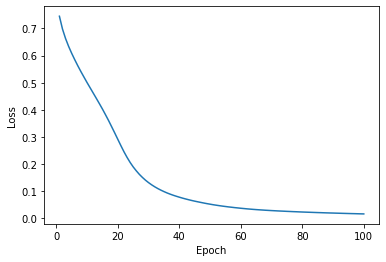

In [21]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [23]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
model

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 5.9661 - accuracy: 0.5276
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 4.8385 - accuracy: 0.5680
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 4.3492 - accuracy: 0.5713
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 4.0488 - accuracy: 0.6196
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 4.0986 - accuracy: 0.6608
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 3.6871 - accuracy: 0.6771
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 3.2623 - accuracy: 0.6752
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 2.3643 - accuracy: 0.7265
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 1.8405 - accuracy: 0.7261
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.7422
Epoch 11/

35/35 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9876
Epoch 84/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9839
Epoch 85/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9807
Epoch 86/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9896
Epoch 87/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9838
Epoch 88/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9896
Epoch 89/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9882
Epoch 90/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9813
Epoch 91/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9879
Epoch 92/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9824
Epoch 93/100


In [25]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[156   1]
 [  1 117]]


0.9927272727272727

In [27]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

False Positives
 [1 1]
False Negetives
 [1 1]
True Positives
 [156 117]
True Negetives
 [117 156]
Sensitivity 
 [0.99363057 0.99152542]
Specificity 
 [0.99152542 0.99363057]
Precision 
 [0.99363057 0.99152542]
Recall 
 [0.99363057 0.99152542]
Áccuracy 
[0.99272727 0.99272727]
FScore 
[0.99363057 0.99152542]


In [28]:
training_loss = model.history['loss']
epoch_count = range(1, len(training_loss) + 1)

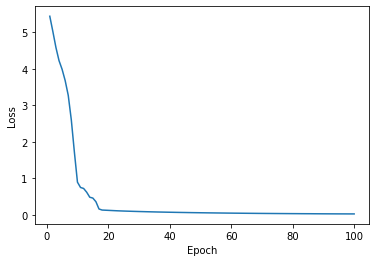

In [29]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();